<a href="https://colab.research.google.com/github/currieea/MML-Book/blob/master/notebooks/ECE570/Assignment_02_Exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ECE 473 Assignment 2 Exercises



Name: Easton Currie

In [9]:
random_seed = 475 # seed to control randomness

## Exercise 1 (5/100 points)

In this exercise, you will need to write a simple function that reverses and doubles the values in a list. For example: input `[1,2,3]`, output `[6,4,2]`.

In [2]:
def reverse_double(input:list)->list:
  for i in range(len(input)):
    input[i] *= 2

  return input[::-1]

  ######  <YOUR CODE>  ###### ######

  ###### ###### ###### ###### ######


A = [8,7,9,6,3,2,5,3]
print(reverse_double(A))

[6, 10, 4, 6, 12, 18, 14, 16]


## Exercise 2 (30/100 points)
In this exercise, you will need to help visualize several different distrubtions.

### Task 1

1.   Using numpy to generate a vector **D** with the following property:

  *   Each element is in a normal distribution.
  *   Vector has the shape **3000x1**

2.   Reshape the vector **D** into **1500x2**

3.   Plot the graph in the following way:
  *   Create a figure of size 6 by 6
  *   Treat the two columns of the array **D** as the **x** and **y** coordinates of 2D points. Use [scatter()](https://matplotlib.org/3.2.2/api/_as_gen/matplotlib.pyplot.scatter.html) to visualize all the spots and set the marker size to be 1
  *   Let the plot shows the range `[-5,5]x[-5,5]`
  *   Give the plot a title (indicating the shape of **D**, i.e., D.shape: (a,b)), and also label the x-axis and y-axis

**Note:** It is always important to include necessary information (e.g. label, legend, title) so that readers won't get confused.




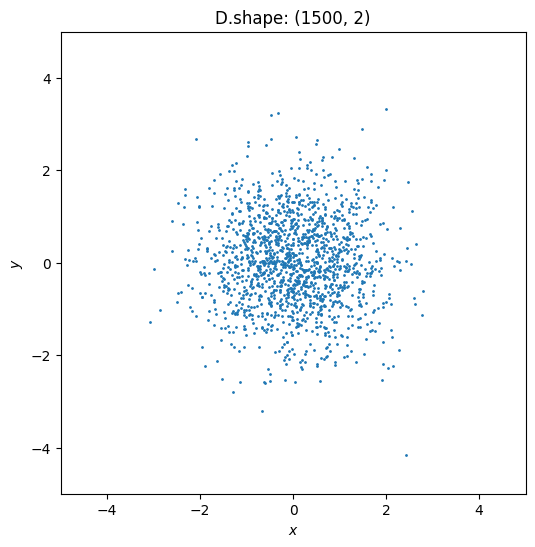

In [2]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(random_seed) # to fix randomness

D = np.random.randn(3000,1).reshape(1500,2) # Generate 1500 x 2 matrix
x, y = D[:,0], D[:, 1] # create x and y vectors from columns of D

# plot
plt.figure(figsize=(6,6))
plt.scatter(x, y, s=1)
plt.axis([-5, 5, -5, 5])
plt.title(f'D.shape: {D.shape}')
plt.xlabel('$x$')
plt.ylabel('$y$');

### Task 2

1. Create an array **R** = $$\begin{bmatrix} 0.5 & 0  \\ 0 & 1 \\  \end{bmatrix}$$
2. Compute **E** = **D** $\times$ **R**.
3. Repeat Step 3 above for **E**. (Title: shape of **E**)

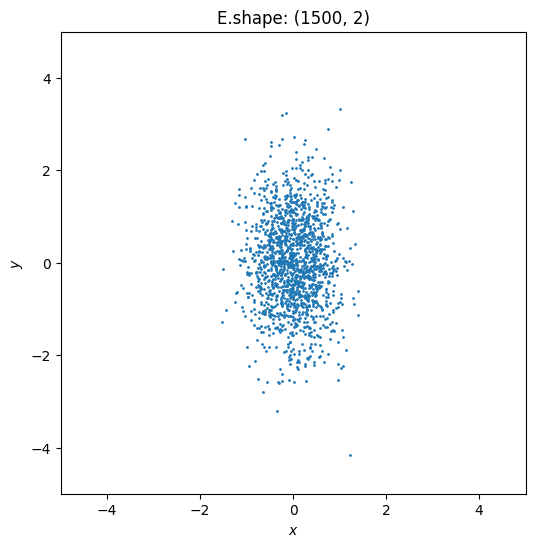

In [4]:
R = np.array([[0.5, 0], [0, 1]]) # Initialize Array
E = D @ R # perform matrix multiplication
x, y = E[:, 0], E[:, 1]

# plot
plt.figure(figsize=(6,6))
plt.scatter(x, y, s=1)
plt.axis([-5, 5, -5, 5])
plt.title(f'E.shape: {E.shape}')
plt.xlabel('$x$')
plt.ylabel('$y$');

### Task 3

1. Create an array **R** = $$\begin{bmatrix} -\sqrt(2)/2 & \sqrt(2)/2  \\ -\sqrt(2)/2 & -\sqrt(2)/2 \\  \end{bmatrix}$$
2. Compute **F** = **E** $\times$ **R**.
3. Repeat Step 3 above for **F**. (Title: shape of **F**)

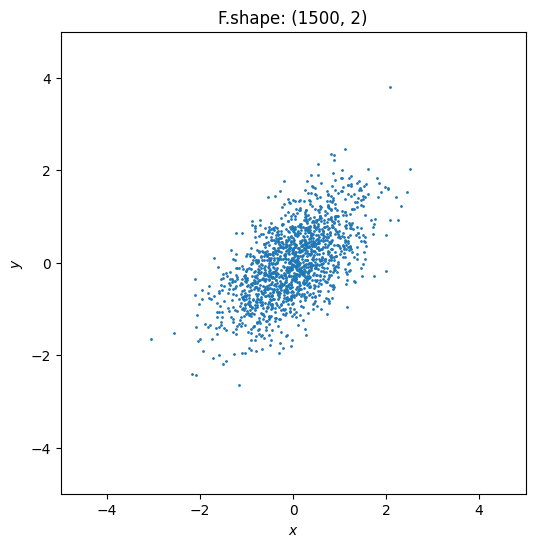

In [5]:
R = np.array([[-1, 1],[-1, -1]]) * np.sqrt(2) / 2
F = E @ R
x, y = F[:, 0], F[:, 1]

# plot
plt.figure(figsize=(6,6))
plt.scatter(x, y, s=1)
plt.axis([-5, 5, -5, 5])
plt.title(f'F.shape: {F.shape}')
plt.xlabel('$x$')
plt.ylabel('$y$');

### Task 4

Plot the above three graphs (D, E and F) in one figure using subplot.

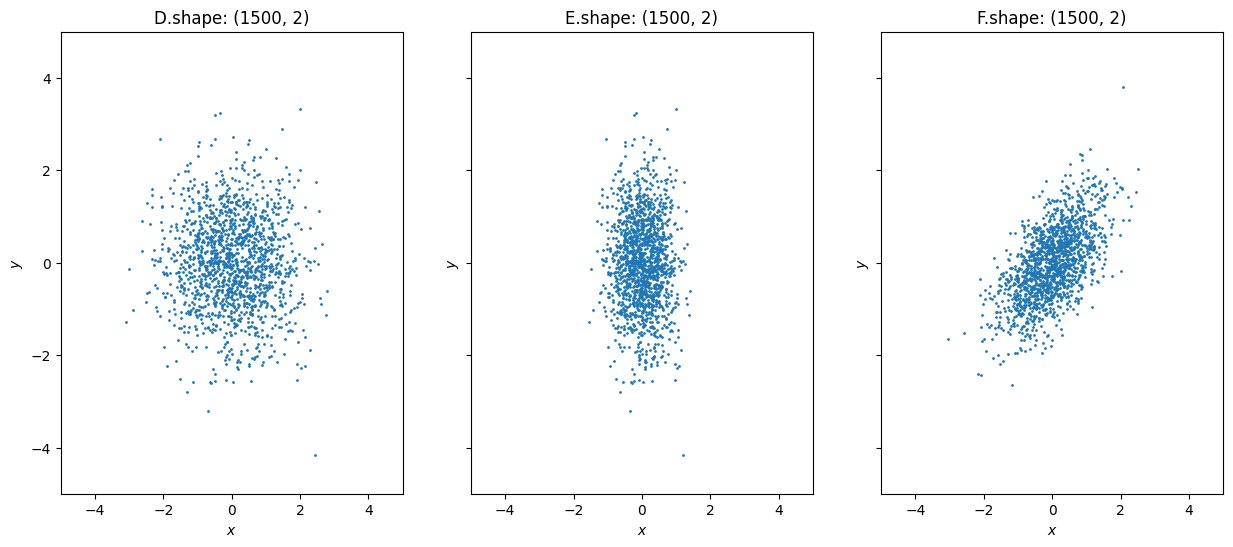

In [6]:
# plot the above three figures in one figure
fig, axes = plt.subplots(1, 3, figsize=(15,6), sharey=True)

ax = axes[0]
x, y = D[:, 0], D[:, 1]
ax.scatter(x, y, s=1)
ax.set_title(f'D.shape: {D.shape}')

ax = axes[1]
x, y = E[:, 0], E[:, 1]
ax.scatter(x, y, s=1)
ax.set_title(f'E.shape: {E.shape}')

ax = axes[2]
x, y = F[:, 0], F[:, 1]
ax.scatter(x, y, s=1)
ax.set_title(f'F.shape: {F.shape}')

for ax in axes:
    ax.set_xlabel('$x$')
    ax.set_ylabel('$y$');
    ax.axis([-5, 5, -5, 5])

## Exercise 3 (65/100 points)

### Task 1: Generate a sparse matrix

1. Generate a matrix **X** with size 200x50 with each element randomly picked from a uniform distribution **U**[0,1].
2. Use logical(boolean) indexing to set the elements in **X** to **0** whenever the value of the element is smaller than 0.95 (In this way, you should get the matrix to have roughly 90% of its elements zero's).
3. Use the function [csr_matrix()](https://docs.scipy.org/doc/scipy/reference/generated/scipy.sparse.csr_matrix.html#scipy.sparse.csr_matrix) to convert the matrix **X** into sparse matrix and call it **X_sparse**.



In [13]:
import numpy as np
from scipy.sparse import csr_matrix
np.random.seed(random_seed) # to fix randomness

X = np.random.rand(200, 50) # generate matrix
X[X < 0.95] = 0 # set values below 0.95 as zero

X_sparse = csr_matrix(X)

print(f'X has type {type(X)} and has {np.sum(X == 0) / (200 * 50) * 100}% of zeros')
print(f'X_sparse has type {type(X_sparse)} and has {np.sum(X == 0) / (200 * 50) * 100}% of zeros')

X has type <class 'numpy.ndarray'> and has 95.44% of zeros
X_sparse has type <class 'scipy.sparse._csr.csr_matrix'> and has 95.44% of zeros


### Task 2: Construct the power iteration function

Following the algorithm in the instructions notebook, write a function that takes a sparse matrix **X** and number of iterations as input and returns the top right singular vector of the centered matrix as output. We have provided some starter code and you need to fill in the rest.

**Suggestions**:

- Before implementing the equations, figure out what type of operation should be applied for each term and what the resulting shapes should be. For example, a dot product should result in a scalar. A matrix vector product should result in a certain size vector. Then map these to numpy operations appropriately.
- Use dot operation for inner product and don’t use numpy transpose.
- See "Sparse implementation in numpy" in the instruction file.
- When you multiply by $\mathbb{1}$, it is equal to sum over dimension.
- Inner product between vectors is scalar.


In [31]:
def power_iter(X, num_iter:int, rng = np.random.RandomState(random_seed)):

  v = rng.randn(X.shape[1])  # Initialize with random vector with shape (d,)
  one_vec = np.ones(X.shape[0])  # All ones vector with shape (n,)
  mu_row_matrix = np.mean(X, axis=0)  # Returns a 1 row matrix with shape (d, 1) since X is of "matrix" type
  mu = np.array(mu_row_matrix).squeeze()  # Convert from a sparse column matrix to a dense 1D array with shape (d,)

  for i in range(num_iter):
    v = (X.T.dot(X.dot(v)) -
         mu * (np.dot(one_vec, X.dot(v))) -
         X.T.dot(one_vec) * (np.dot(mu, v)) +
         mu * np.dot(one_vec, one_vec) * np.dot(mu, v)
         )

    v = v / np.linalg.norm(v, 2) # normalize

  return v



v1_yours = power_iter(X_sparse,1000).squeeze()
print(v1_yours.shape)
print("[ 0.0889675   0.04031599  0.11011615  0.12741811  0.07429968 -0.06799411
  0.10711233 -0.00908791 -0.07115777 -0.02676343 -0.16988287 -0.3320429
 -0.2345016  -0.31750069  0.17904901  0.10265723  0.09519172  0.03512851
  0.18548771 -0.06355862  0.08029645  0.06489604 -0.06325435  0.01701799
  0.24041193 -0.01658139 -0.29468648 -0.06226492 -0.36806208 -0.07147351
  0.10847212  0.04048925 -0.01320664 -0.01944499  0.11280209 -0.14491688
 -0.04861763 -0.11094128 -0.21053892  0.12811887 -0.03924574 -0.01401451
  0.01917849 -0.06483628  0.04281282  0.10742677 -0.07260751  0.12531145
  0.28318794  0.01027113]")

(50,)
[ 0.0889675   0.04031599  0.11011615  0.12741811  0.07429968 -0.06799411
  0.10711233 -0.00908791 -0.07115777 -0.02676343 -0.16988287 -0.3320429
 -0.2345016  -0.31750069  0.17904901  0.10265723  0.09519172  0.03512851
  0.18548771 -0.06355862  0.08029645  0.06489604 -0.06325435  0.01701799
  0.24041193 -0.01658139 -0.29468648 -0.06226492 -0.36806208 -0.07147351
  0.10847212  0.04048925 -0.01320664 -0.01944499  0.11280209 -0.14491688
 -0.04861763 -0.11094128 -0.21053892  0.12811887 -0.03924574 -0.01401451
  0.01917849 -0.06483628  0.04281282  0.10742677 -0.07260751  0.12531145
  0.28318794  0.01027113]


### Task 3: Verifying your top singular vector
Using any method you like to verify the vector that is computed by your function is indeed the top right singular vector of the **centered** data matrix.
First write another function that outputs the top right singular vector for sure (you can use the function [svd()](https://numpy.org/doc/stable/reference/generated/numpy.linalg.svd.html), note that it returns $V^T$ instead of $V$).
Then, the provided code will compute the mean absolute error (MAE) between the two functions you wrote.
(Note: The provided evaluation code will correct for the fact that the two vectors can be the negative of each other singular value decomposition is only unique up to signs).
The MAE should be close to machine precision (i.e., it should be less than about `1e-15`).

**Note:** This is for testing the correctness of your algorithm.
It is often a very good idea to write simple checks of your code as you write it to avoid bugs early on in your development process.
Do not worry about efficiency for this exercise.

In [30]:
def verify_v1(X):
  # Compute the top right singular vector using other methods
  U, s, V_T = np.linalg.svd(X)
  return V_T[0,:]



# Note here we just pass in the dense 2D array `X`
#  which represents the same matrix as `X_sparse`
v1_simple = verify_v1(X).squeeze()
# Compute a sign corrected difference between the vectors
#  (accounting for the fact that SVD is only unique up to signs)
diff_sign_corrected = np.sign(v1_yours[0]) * v1_yours - np.sign(v1_simple[0]) * v1_simple
mae_corrected = np.mean(np.abs(diff_sign_corrected))
print(f'The average absolute difference of the two function output is {mae_corrected}')

The average absolute difference of the two function output is 0.14722651045571764


### Task 4: Comparing runtimes of `power_iter`
Below, try `power_iter` method with larger sparse and dense X matrices (100x100, 1000 x 1000, 10000x10000 with 10%, 1%, 0.1%, 0.01% nonzeros, i.e. very sparse) and time the difference.
That is, compare the time time taken by `power_iter(X_sparse,20)` and `power_iter(X,20)`.
Use `time.time()` to capture the start and end times (subtracting them gets you the time in seconds).

What do you observe?

In [ ]:
import time
np.random.seed(random_seed) # to fix randomness
for threshold in [0.9, 0.99, 0.999, 0.9999]:
    print(f"Nonzero {(1 - threshold) * 100:.2f}%")
    for dim in [100, 1000, 10000]:
        ###### ###### Your code ###### ######

        ###### ###### ######### ###### ######
        ratio = normal_time/sparse_time
        print(f"Size: {dim}x{dim} - Sparse method is {ratio if ratio > 1 else 1/ratio:.3f} times {'faster' if ratio >1 else 'slower'}")



### (Optional and ungraded, 0 points) Task 5: Going beyond

- In what scenarios we might find the power iteration method useful?
  - Google's original ranking algorithm called "PageRank" uses a variant of this power iteration on very sparse graphs that represent connections between websites.  See [PageRank](https://en.wikipedia.org/wiki/PageRank).
- Can you optimize your algorithm further by avoiding reusing computations?
